In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

### Loading dataset

In [99]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Printing basic information about the dataset

In [100]:
print("Number of Samples: ", df.shape[0])
print("Number of Features: ", df.shape[1]-1)
print("Feature Names: ", iris.feature_names)
print("Target Classes: ", iris.target_names)

Number of Samples:  150
Number of Features:  4
Feature Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes:  ['setosa' 'versicolor' 'virginica']


### Printing statistical data about the dataset.

In [101]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking for null values.

There are no null values in this dataset.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Scaling features.

In [103]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1)) # Dropping target to avoid scaling

df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['target'] = df['target']  # Adding target column back after scaling the rest

df_scaled


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


## Clustering Models

### K-means Clustering

Silhouette Score: 0.4388714430044551
Davies-Bouldin Index: 0.7891100119555844
Calinski-Harabasz Index: 141.36488102351294


/Users/rishabh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


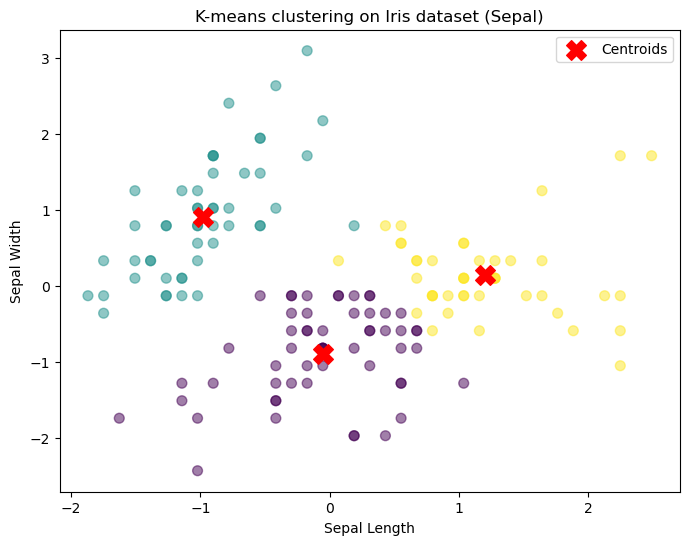

In [104]:
X = df_scaled.iloc[:, 0:2]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means clustering on Iris dataset (Sepal)')
plt.legend()
plt.show()

/Users/rishabh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.44787107939629056
Davies-Bouldin Index: 0.8598835258074646
Calinski-Harabasz Index: 117.94516567514088


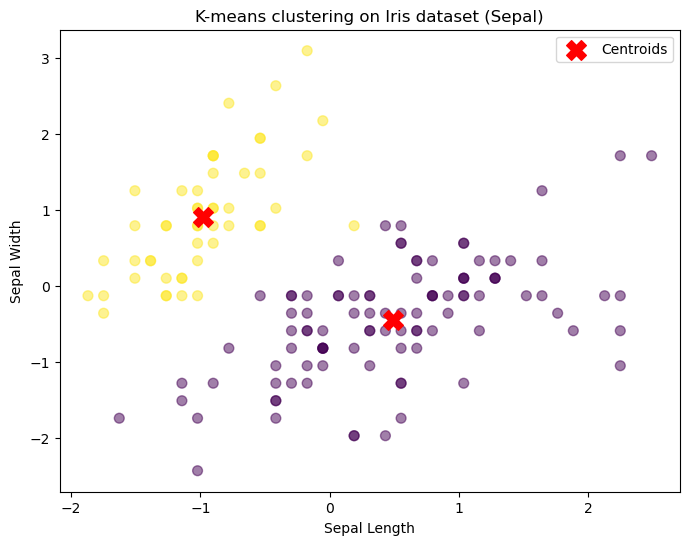

In [105]:
# Trying 2 clusters

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means clustering on Iris dataset (Sepal)')
plt.legend()
plt.show()

Silhouette Score: 0.4182834653796165
Davies-Bouldin Index: 0.7564779940333696
Calinski-Harabasz Index: 134.37999770500275


/Users/rishabh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


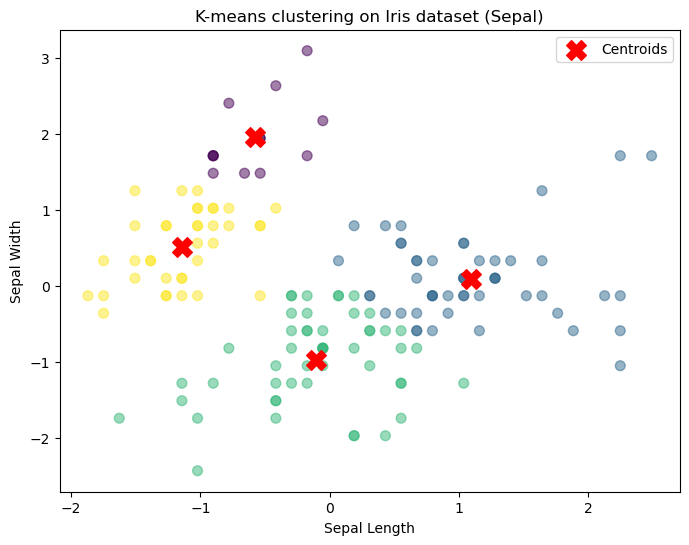

In [106]:
# Trying 4 clusters

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means clustering on Iris dataset (Sepal)')
plt.legend()
plt.show()

### Hierarchial Clustering


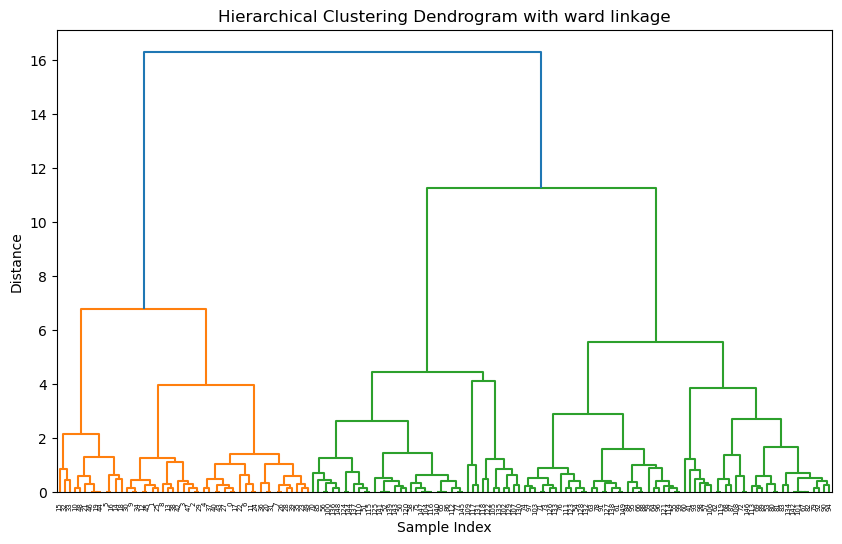

In [112]:
# Using Ward's linkage

linkage = 'ward'
h_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
h_clustering.fit(X)

labels = h_clustering.labels_

Z = hierarchy.linkage(X, method=linkage)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendogram = hierarchy.dendrogram(Z)
plt.title(f'Hierarchical Clustering Dendrogram with {linkage} linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Silhouette Score: 0.4385995107638119
Davies-Bouldin Index: 0.7983209007773254
Calinski-Harabasz Index: 139.01140212653996


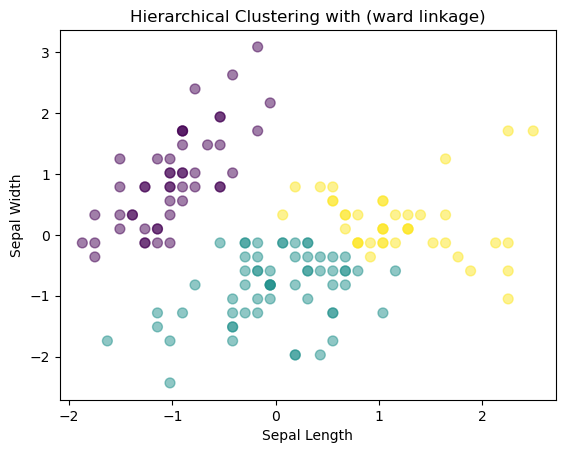

In [113]:


# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'Hierarchical Clustering with ({linkage} linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Silhouette Score: 0.22617083406478003
Davies-Bouldin Index: 0.5483073762354217
Calinski-Harabasz Index: 5.7525935343364925


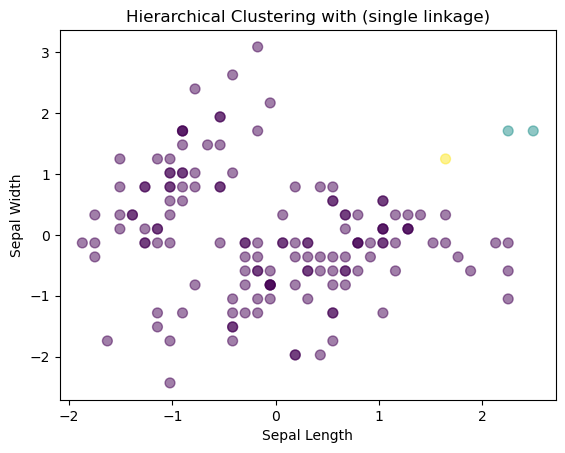

In [109]:
# Using Single Linkage

linkage = 'single'
h_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
h_clustering.fit(X)

labels = h_clustering.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'Hierarchical Clustering with ({linkage} linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Silhouette Score: 0.38127491445502604
Davies-Bouldin Index: 0.7983250777206375
Calinski-Harabasz Index: 110.79681674763006


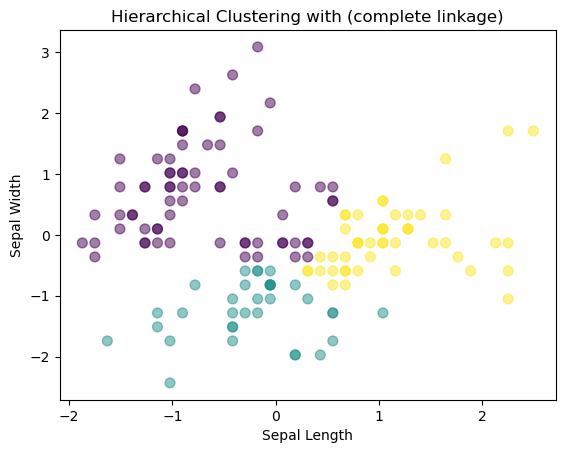

In [110]:
# Using complete linkage

linkage = 'complete'
h_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage)
h_clustering.fit(X)

labels = h_clustering.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'Hierarchical Clustering with ({linkage} linkage)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### DBSCAN

Silhouette Score: 0.391959020538701
Davies-Bouldin Index: 2.9615074521949896
Calinski-Harabasz Index: 5.385766013296385


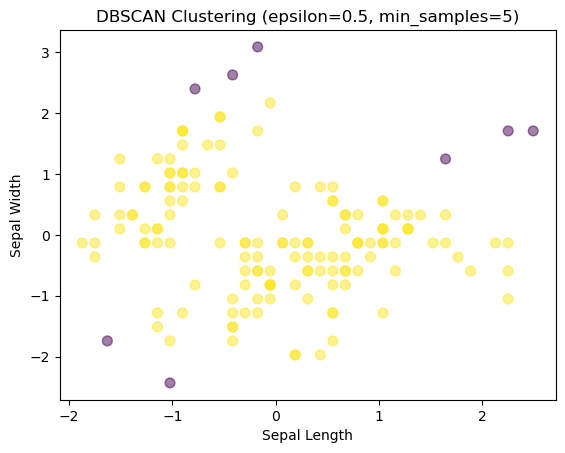

In [114]:
# DBSCAN with epsilon value of 0.5 and min_samples=5

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(X)
labels = dbscan.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'DBSCAN Clustering (epsilon={eps}, min_samples={min_samples})')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Silhouette Score: -0.1020547285857797
Davies-Bouldin Index: 2.3857642017774365
Calinski-Harabasz Index: 2.6650472685613824


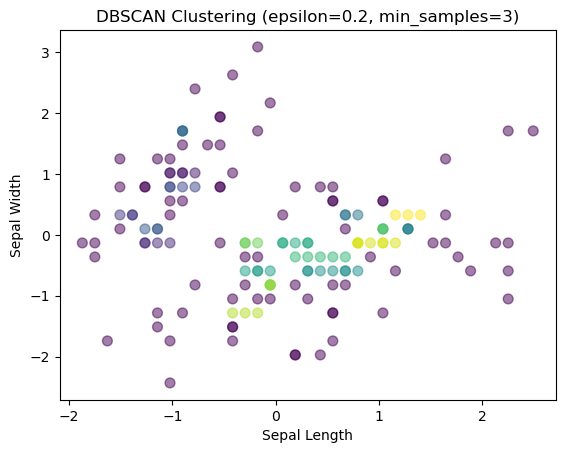

In [115]:
# DBSCAN with epsilon value of 0.2 and min_samples=3

eps = 0.2
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(X)
labels = dbscan.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'DBSCAN Clustering (epsilon={eps}, min_samples={min_samples})')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Silhouette Score: 0.417979801247809
Davies-Bouldin Index: 0.46596791138993854
Calinski-Harabasz Index: 9.067067834206902


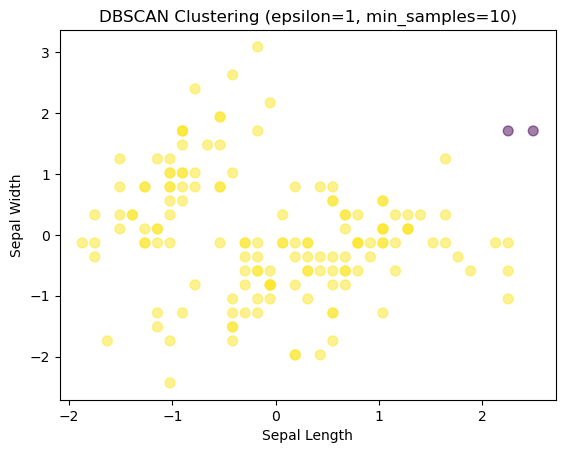

In [117]:
# DBSCAN with epsilon value of 1.0 and min_samples = 5

eps = 1
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)

dbscan.fit(X)
labels = dbscan.labels_

# Calculate silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.title(f'DBSCAN Clustering (epsilon={eps}, min_samples={min_samples})')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()